In [17]:
project_name = "1stm"

"1stm"

In [18]:
using Printf, DelimitedFiles
using Plots
using Combinatorics
using LinearAlgebra
using Statistics
using MDToolbox
ENV["COLUMNS"] = 130; #display width for MDToolbox

In [19]:
pdb = readpdb(project_name * ".vdb")["protein and not hydrogen and atomname CA"]

1x141 TrjArray{Float64, Int64}
| A                          | A                          |  …   A                          | A                          |
| 17ALA                      | 18ALA                      |  …   156SER                     | 157SER                     |
| 4246CA                     | 4251CA                     |  …   5294CA                     | 5300CA                     |
|     5.36   -14.42    55.53 |     5.53   -11.91    58.34 |  …       4.84   -19.02    75.37 |     2.12   -20.37    77.67 |

In [20]:
# 28
R = [0.00000 1.00000 0.00000;
     0.00000 0.00000 1.00000;
     1.00000 0.00000 0.00000]

3×3 Matrix{Float64}:
 0.0  1.0  0.0
 0.0  0.0  1.0
 1.0  0.0  0.0

In [21]:
# 29
R = [0.00000 -1.00000 0.00000;
     0.00000 0.00000 1.00000;
     -1.00000 0.00000 0.00000]

3×3 Matrix{Float64}:
  0.0  -1.0  0.0
  0.0   0.0  1.0
 -1.0   0.0  0.0

In [22]:
#pdb_rotated = MDToolbox.rotate_with_matrix(pdb, R)

In [23]:
xx = mean(pdb.xyz[1, 1:3:end])
yy = mean(pdb.xyz[1, 2:3:end])
zz = mean(pdb.xyz[1, 3:3:end])
fac = sqrt(xx^2 + yy^2 + zz^2)

println("scaling factor: $(fac)")

scaling factor: 68.08056901007683


In [24]:
xx = pdb.xyz[1, 1:3:end] ./ fac
yy = pdb.xyz[1, 2:3:end] ./ fac
zz = pdb.xyz[1, 3:3:end] ./ fac
xyz = [xx[:] yy[:] zz[:]];

In [25]:
using BSON: @save, @load
@load "omega.bson" omega

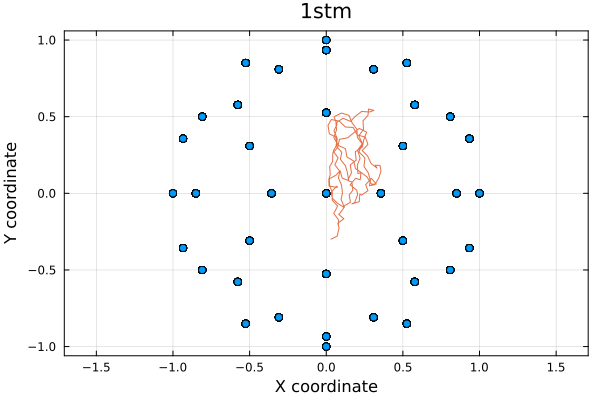

In [26]:
scatter(omega[:, 1], omega[:, 2], framestyle = :box,
        aspect_ratio = :equal, label=nothing)

plot!(xyz[:, 1], xyz[:, 2], color=2, label=nothing, title="$(project_name)")

xlabel!("X coordinate")
ylabel!("Y coordinate")

In [27]:
writedlm(project_name * ".csv", xyz, ',')

In [28]:
using BSON: @save, @load
@load "omega_threefold.bson" omega_threefold
@load "omega_fivefold.bson" omega_fivefold

iomega_threefold = 0
n_max = 0.0
for j = 1:size(omega_threefold, 1)
    n = sum(omega_threefold[j:j, :] .* mean(xyz, dims=1))
    if n_max < n
        iomega_threefold = j
        n_max = n
    end    
end

iomega_threefold
n_max

iomega_fivefold = 0
n_max = 0.0
for j = 1:size(omega_fivefold, 1)
    n = sum(omega_fivefold[j:j, :] .* mean(xyz, dims=1))
    if n_max < n
        iomega_fivefold = j
        n_max = n
    end    
end

iomega_fivefold
n_max

0.9224439825292099

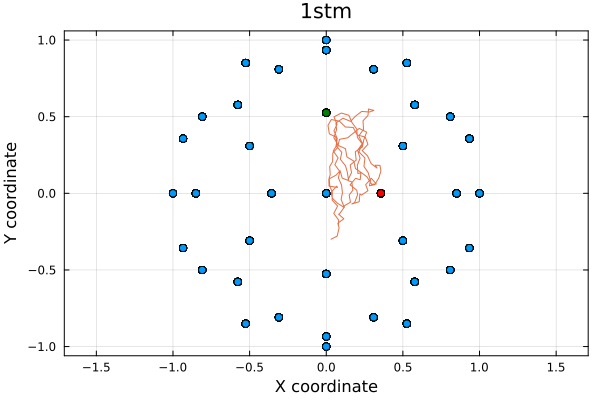

In [29]:
scatter(omega[:, 1], omega[:, 2], framestyle = :box,
        aspect_ratio = :equal, label=nothing)

scatter!(omega_threefold[iomega_threefold:iomega_threefold, 1], 
         omega_threefold[iomega_threefold:iomega_threefold, 2], 
         framestyle = :box,
         aspect_ratio = :equal, label=nothing,
         color = :red)

scatter!(omega_fivefold[iomega_fivefold:iomega_fivefold, 1], 
         omega_fivefold[iomega_fivefold:iomega_fivefold, 2], 
         framestyle = :box,
         aspect_ratio = :equal, label=nothing,
         color = :green)

plot!(xyz[:, 1], xyz[:, 2], color=2, label=nothing, title="$(project_name)")

xlabel!("X coordinate")
ylabel!("Y coordinate")

In [30]:
omega_threefold[iomega_threefold:iomega_threefold, :]

1×3 Matrix{Float64}:
 0.356785  5.96043e-5  0.934187

In [31]:
omega_fivefold[iomega_fivefold:iomega_fivefold, :]

1×3 Matrix{Float64}:
 7.22877e-5  0.525646  0.850703